In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
1.Import necessary libraries
</div>


In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
2. Load the dataset
</div>


In [3]:
df=pd.read_csv("/kaggle/input/employee-dataset/Employee.csv")

<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
3. Basic Data Exploration
</div>

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
    Display DataFrame
</div>


In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
    Dataset Shape 
</div>


In [5]:
df.shape  

(4653, 9)

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
    Dataset Information
</div>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
    Dataset Statistics
</div>


In [7]:
df.describe() 

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
4.  Data Preprocessing
</div>

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
    Missing Values
</div>

In [8]:
df.isnull().sum()  

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
  Label encoding
</div>

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [10]:
categorical_columns = ['Gender', 'EverBenched', 'Education','City']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
  Define features and the target variable
</div>

In [11]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
5. Data Visualization
</div>

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
    Age Distribution
</div>


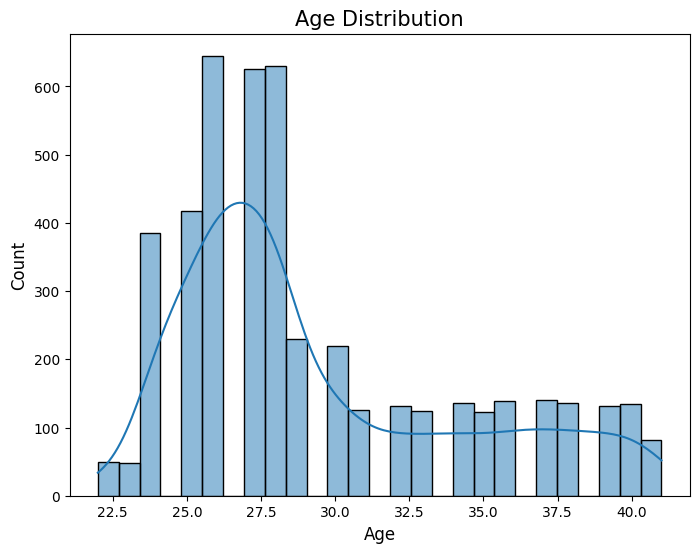

In [12]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Age'], kde=True)

plt.title('Age Distribution',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
    Gender Distribution
</div>


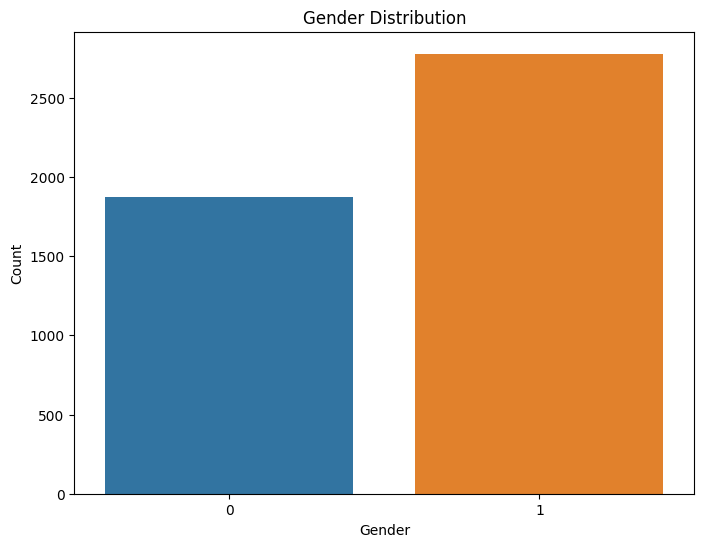

In [13]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Gender')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
   Bar Plot 
</div>

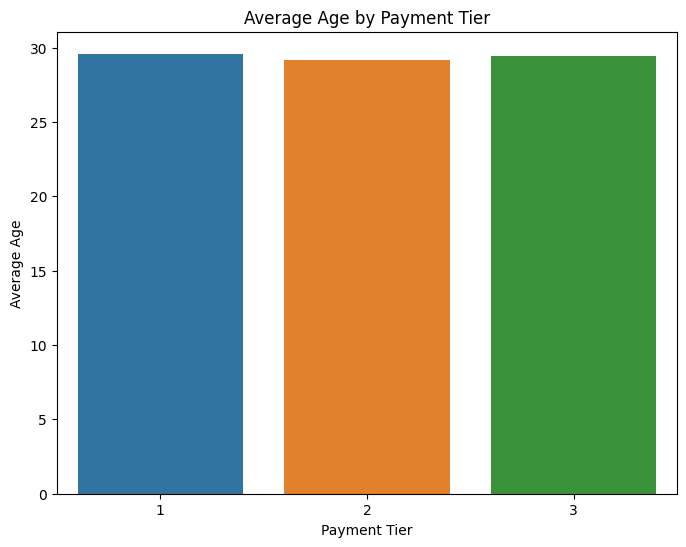

In [14]:
plt.figure(figsize=(8, 6))

sns.barplot(data=df, x='PaymentTier', y='Age',errorbar=None)

plt.title('Average Age by Payment Tier')
plt.xlabel('Payment Tier')
plt.ylabel('Average Age')

plt.show() 


<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
6. Data Splitting
</div>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
7. Model Building
</div>

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
  Model Selection
</div>

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
  Model Training
</div>

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions on the test set

y_pred = model.predict(X_test)


<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
8. Evaluation
</div>

<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
  Evaluate the model
</div>


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.96%


<div style="
    background-color: #FFFFE0;
    padding: 5px;
    border-radius: 5px;
    box-shadow: 0 0 5px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 18px;
    color: #333;
    font-weight: bold;">
  Classification Report 
</div>


In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       610
           1       0.82      0.72      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



<div style="
    background-color: black;
    padding: 20px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 25px;
    color: white;
    font-weight: bold;">
9. Confusion Matrix
</div>

In [24]:
from sklearn.metrics import confusion_matrix

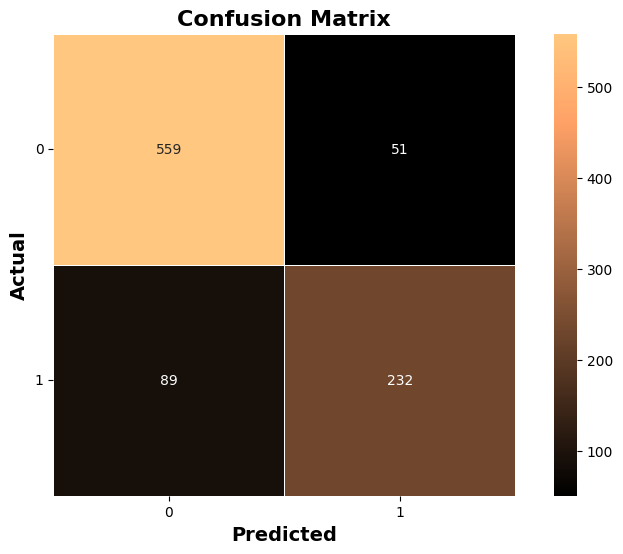

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='copper', linewidths=0.4, square=True, cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

<div style="
    background-color: black;
    padding: 30px;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
    text-align: center;
    font-size: 35px;
    color: white;
    font-weight: bold;">
Thank You
</div>